In [1]:
import import_ipynb
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras

### Loading and splitting data


In [3]:
(X_train, y_train),(X_test,y_test)= keras.datasets.cifar10.load_data()

In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(X_train[0].shape)

(32, 32, 3)


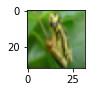

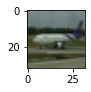

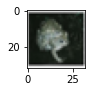

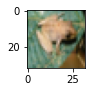

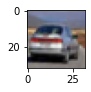

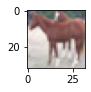

In [6]:
for i in range(232,238):
    plt.subplot(120+ 1+i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

### Preprocessing The Data


In [7]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test=X_test/255
n_classes=10

print("Shape before one hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one hot encoding: ",Y_train.shape)

Shape before one hot encoding:  (50000, 1)
Shape after one hot encoding:  (50000, 10)


### Building Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model= Sequential()
#Convolution layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Hidden layers
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

#Output Layers
model.add(Dense(10,activation='softmax'))

#Compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#Training Model
model.fit(X_train,Y_train,batch_size=128,epochs=20,validation_data=(X_test,Y_test))


Epoch 1/20
391/391 [==============================] - 318s 784ms/step - loss: 1.5808 - accuracy: 0.4175 - val_loss: 1.1278 - val_accuracy: 0.6042
Epoch 2/20
391/391 [==============================] - 272s 697ms/step - loss: 1.0891 - accuracy: 0.6125 - val_loss: 0.9093 - val_accuracy: 0.6823
Epoch 3/20
391/391 [==============================] - 271s 693ms/step - loss: 0.9041 - accuracy: 0.6830 - val_loss: 0.8178 - val_accuracy: 0.7179
Epoch 4/20
391/391 [==============================] - 270s 691ms/step - loss: 0.8018 - accuracy: 0.7204 - val_loss: 0.7446 - val_accuracy: 0.7401
Epoch 5/20
391/391 [==============================] - 283s 723ms/step - loss: 0.7127 - accuracy: 0.7498 - val_loss: 0.7073 - val_accuracy: 0.7554
Epoch 6/20
391/391 [==============================] - 299s 765ms/step - loss: 0.6515 - accuracy: 0.7724 - val_loss: 0.7051 - val_accuracy: 0.7578
Epoch 7/20
391/391 [==============================] - 291s 745ms/step - loss: 0.6001 - accuracy: 0.7887 - val_loss: 0.6651 -

### Predicting

In [12]:
classes=range(0,10)
names=['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck']

#Zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes,names))

#Generate Batch of 9 Images to Predict
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

#Make Predictions
predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 3s 3s/step


In [13]:
print(predictions)

[[8.0527116e-06 3.6670406e-06 1.2618391e-02 2.0858373e-02 4.7121161e-01
  7.2174035e-02 3.5294017e-04 4.2272565e-01 2.3992929e-05 2.3335719e-05]
 [1.6321917e-05 6.0392767e-06 5.7981178e-02 8.8644646e-02 2.3901803e-02
  7.2966802e-01 8.5030936e-02 1.4347664e-02 3.8550247e-04 1.7952911e-05]
 [9.1492842e-07 6.3126272e-06 1.7474586e-04 1.2683962e-03 2.4646912e-05
  2.9547131e-03 9.9547547e-01 3.4782715e-05 2.1452464e-05 3.8612703e-05]
 [6.1220147e-11 1.2407170e-09 2.4514947e-07 9.9679655e-01 8.2453398e-06
  2.0097414e-04 2.9938894e-03 9.5097015e-09 2.7297935e-08 3.4539170e-08]
 [9.7453201e-14 9.9999797e-01 1.6749352e-17 4.8495289e-16 1.5051325e-21
  4.0854828e-19 4.2343020e-18 1.4195971e-17 5.2239563e-12 2.0384437e-06]
 [4.5465846e-11 9.9981362e-01 8.0167383e-12 5.5579658e-10 2.2913315e-14
  1.6089845e-12 2.5570883e-09 2.2668506e-13 4.7434053e-08 1.8641356e-04]
 [5.1101921e-03 1.2810209e-02 2.2079099e-02 7.3796266e-01 1.8318094e-03
  1.5446451e-01 2.1682819e-02 9.2398617e-03 3.3179514e-02 

In [14]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
1.0
0.99999994
1.0
1.0000001
1.0000001
1.0000001
1.0


In [15]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


### Final Object Detection

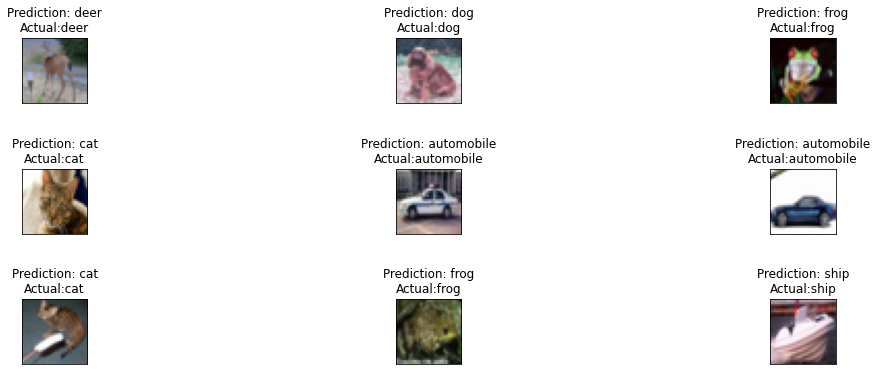

In [18]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='Prediction: {}\nActual:{}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #PLOT IMAGE
    axs[i].imshow(img)
    
#Show The Plot
plt.show()